# Digit Recognizer

Similar to the Titanic project, the Digit Recognizer Competition on Kaggle is meant for learning about computer vision. I've noticed that many of the submissions for this project use CNN. Due to SuperDataScience on Udemy, I am familiar with some common and useful machine learning models however at the start of this project, I know very little about Neural Networks and Deep Learning. My hope for this project is to gain some knowledge into how to and why you should set up Neural Networks in a certain way to create a model. 
Through this second project of mine, I hope to learn and clarify information on neural networks and use some new tools like keras. 

Using TensorFlow backend.


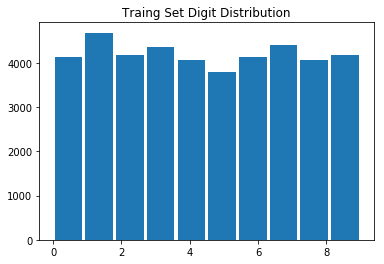

y_train Summary


count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

In [1]:
# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.utils.np_utils import to_categorical
import pickle
%matplotlib inline
# Determine which keras tools you want to use

# Load data
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

X_train = df_train.iloc[:,1:]
y_train = df_train['label']
X_test = df_train.iloc[:,1:]
y_test = df_train['label']

# Verify data is valid (should be, coming from Kaggle)
plt.hist(y_train, rwidth = 0.9)
plt.title("Traing Set Digit Distribution")
plt.show()
print("y_train Summary")
y_train.describe()

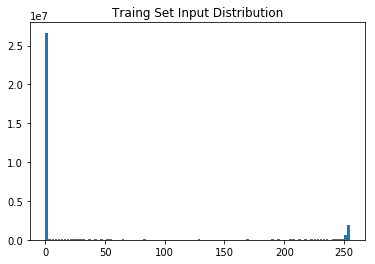

x_train Summary


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [2]:
# Examine how data looks
X_train_array = X_train.to_numpy().flatten()
plt.hist(X_train_array, rwidth = 0.9, bins=100)
plt.title("Traing Set Input Distribution")
plt.show()
print("x_train Summary")
X_train.describe()

Clearly, the input has a lot of zero values, where 0 indicates the abscence of writing in a visual representation of drawing these digits. With help from Yassine Ghouzam's Kaggle kernel (https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6), let's visualize what some of these inputs actually look like. 

In [3]:
# Visualize input

# calling it X_train since each set of imput will be an input matrix (denoted X) as oppose to the vector of inputs x
# .reshape(-1) has the same effect as .flatten() seen above - I didn't specify reshape(num_cols, -1) so the default in a sense
# is to flatten the np.array. It then reshapes it into 28x28x1 matrices, one for each picture input
X_train = X_train.to_numpy().reshape(-1,28,28,1)
X_test = X_test.to_numpy().reshape(-1,28,28,1)
df_test = df_test.to_numpy().reshape(-1,28,28,1)
# Try running this with (-1,28,28) and you'll notice
# you get a 1xNumber_of_input_picturesx28x28 which is not as easy a format to deal with

# Encode labels (digit value) to sparse vectors
# ex. let n represent the label value
#     vector_n = [(1 if digit == n else 0) for digit in label_options]
#     5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
y_train = to_categorical(y_train, num_classes = 10)

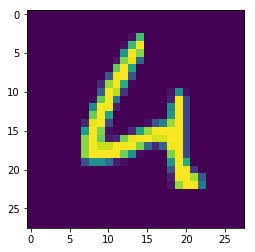

In [4]:
# Randomly show one of the 42000 images in X_train
plt.imshow(X_train[np.random.randint(42000)][:,:,0])

Next, I'll be constructing my Convolutional Neural Network using Keras.

After reading through a number of articles, it seems that there is no true proven, systematic way you should go about creating your CNN. That said, there are some standard ways to create CNNs for image recognition. There are also some conventions such as choosing a power of 2 for the number of convolution filters. Through looking at these commonly successful approaches, using intuition and some guessing, a good model can be developed. 

Of course, as we'll see later, there are some simple things such as increasing the number of epochs to increase the accuracy of your model. With data generation based off of the given data, each epoch trains the model (through backpropagation) with data altered from our original data.

In [5]:
# import deep learning objects
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense

With Keras, you have the option to construct your ANN with a Sequential model or a Functional model.

$\underline{\text{Sequential Model}}$

A Sequential model makes it easy to create a straightforward deep learning model. Layers are added to the Sequential object and layers pass their outputs to the next layer in the sequence. This means with a few lines of code, you can build a pretty robust model, depending on the complexity of the problem at hand. This works for the digit recognizer since the layers have an order they should go in:

Convolutional Filteration $\rightarrow$ MaxPooling (Repeat previous two layers as needed) $\rightarrow$ Flatten $\rightarrow$ Dense Layer(s) $\rightarrow$ Categorical Output

$\underline{\text{Functional Model}}$

A Functional model is highly customizable which allows for personalization such as having any layer communicate with any other layer. This is great for designing RNNs and other models that don't process data in the single, sequential way seen here.

In [6]:
# Create the Sequential model
model = Sequential()
model.add(Conv2D(32,
                 kernel_size=4,
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(32,
                 kernel_size=4,
                 activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64,
                 kernel_size=3,
                 activation='relu'))
model.add(Conv2D(64,
                 kernel_size=3,
                 activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))
model.add(Flatten())
# output_dim should be somewhere between the number of inputs and the number of outputs
# 128 follows the power of 2 convension
model.add(Dense(activation='relu', units=128))
model.add(Dropout(0.50))
# softmax to output the classification with the highest probability
# each element of y_train/the output is a digit (0-9)
model.add(Dense(activation='softmax', units=10))
# adam is a generally practical optimizer, 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [7]:
from keras.preprocessing.image import ImageDataGenerator

# Create data generators
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2)

test_data_gen = ImageDataGenerator(rescale=1./255)

In [8]:
num_epochs = 30
# train model
# fits model using the modification parameters entered above 
# with a batch_size of 1000, there will be 42 batches (42000 sample in X_train)
model.fit_generator(train_data_gen.flow(X_train, y_train, batch_size=2000), epochs=num_epochs)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/40
21/21 [==============================] - 45s 2s/step - loss: 2.2158 - acc: 0.1792
Epoch 2/40
21/21 [==============================] - 46s 2s/step - loss: 1.8577 - acc: 0.3462
Epoch 3/40
21/21 [==============================] - 46s 2s/step - loss: 1.5201 - acc: 0.4796
Epoch 4/40
21/21 [==============================] - 46s 2s/step - loss: 1.2265 - acc: 0.5871
Epoch 5/40
21/21 [==============================] - 46s 2s/step - loss: 0.9968 - acc: 0.6718
Epoch 6/40
21/21 [==============================] - 46s 2s/step - loss: 0.8591 - acc: 0.7200
Epoch 7/40
21/21 [==============================] - 46s 2s/step - loss: 0.7585 - acc: 0.7582
Epoch 8/40
21/21 [==============================] - 46s 2s/step - loss: 0.6913 - acc: 0.7777
Epoch 9/40
21/21 [==============================] - 46s 2s/step - loss: 0.6377 - acc: 0.7981
Epoch 10/40
21/21 [==============================] - 46s 2s/step - lo

$\underline{\text{Batches Explained}}$

Batches are how many samples are fitted at a time - the models' dense layers' weights are updated after each batch.
Large batches lead to fairly stable convergence of the model's weights. However, they take up more memory and take longer to train than smaller batches. So, some consideration has to be given to the machine you train your model on, as well as the size of your dataset. 

In [9]:
# save trained model
filename = 'model3.pickle' 
with open(filename, 'wb') as file:
    pickle.dump(model, file, protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
# load in model
filename = 'model3.pickle'
with open(filename, 'rb') as file:
    model = pickle.load(file)

In [9]:
# predict with test data
Y_preds = model.predict(X_test)
# sparse vector -> label
y_preds = np.argmax(Y_preds,axis = 1)

Accuracy Score:
0.9685


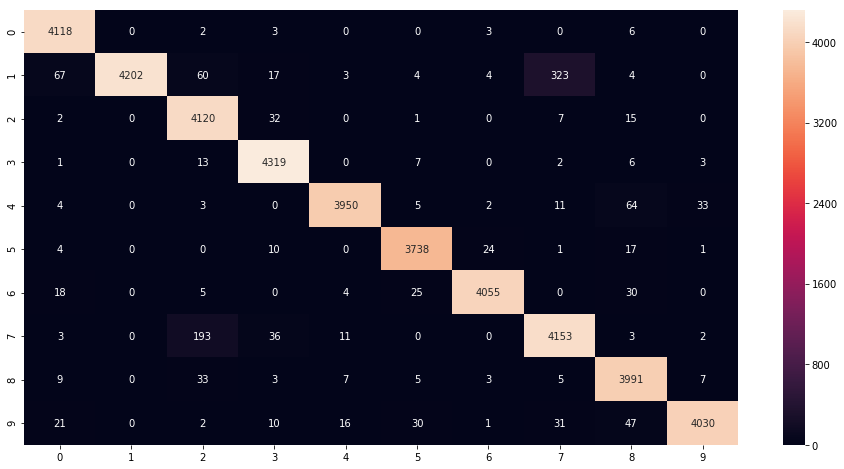

In [10]:
# examine errors/confusion matrix
confusion_matrix = confusion_matrix(y_test, y_preds)

plt.figure(figsize = (16,8))
sns.heatmap(confusion_matrix, fmt='g', annot=True)
print('Accuracy Score:')
print(round(accuracy_score(y_test, y_preds), 4))

In [11]:
mislabelled_inds = y_preds != y_test
mislabelled_imgs = X_test[mislabelled_inds]
predicted = y_preds[mislabelled_inds]
actual = y_test[mislabelled_inds]
num_errors = len(mislabelled_imgs)
# actual is a pd series and stores the original indices with the values
actual.reset_index(drop=True, inplace=True)

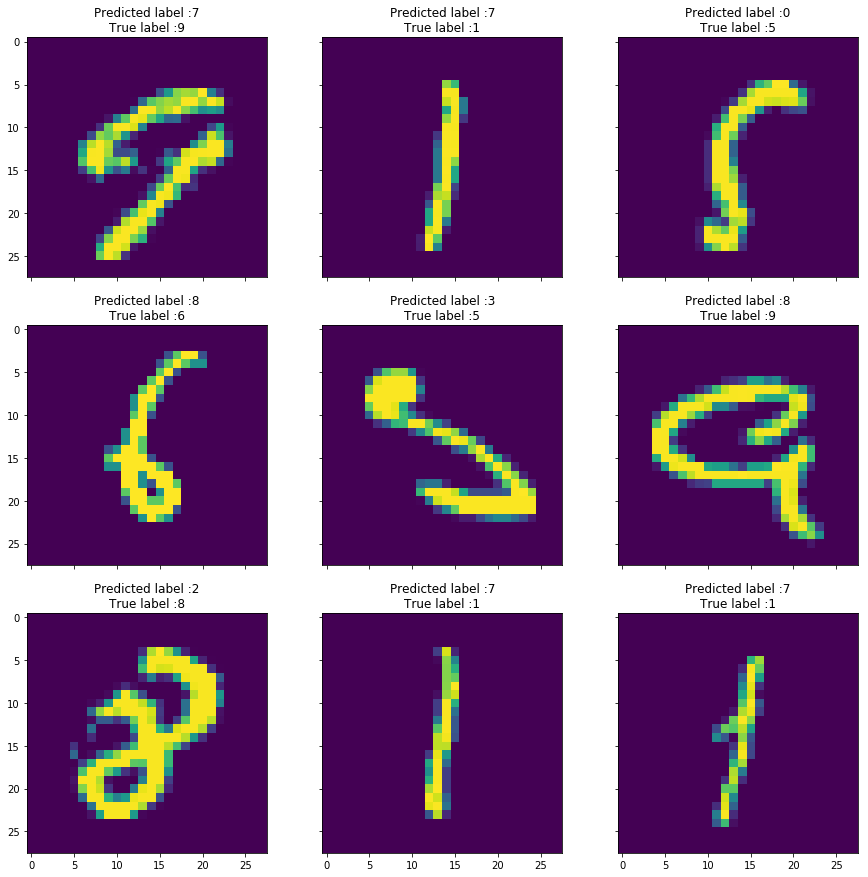

In [12]:
# Adapted from Yassine Ghouzam's article
# https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6
n = np.random.randint(num_errors)
nrows = 3
ncols = 3
plt.rcParams['figure.figsize'] = [15, 15]
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
for r in range(nrows):
    for c in range(ncols):
        ax[r,c].imshow((mislabelled_imgs[n]).reshape((28,28)))
        ax[r,c].set_title("Predicted label :{}\nTrue label :{}".format(predicted[n],actual[n]))
        n += 1

Clearly, the current model still makes some silly mistakes. Still, over 97% on the first try means it is working quite well generally. Let's submit our final results, then I can try out and tweak the model.

In [13]:
sample_sub = pd.read_csv('sample_submission.csv')
sample_sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [14]:
# Submission & Conclusion
# predict with test data
Y_test_pred = model.predict(df_test)
# sparse vector -> label
submission_preds = pd.DataFrame(np.argmax(Y_test_pred, axis = 1))
submission_preds.head()

,0
0,2
1,0
2,9
3,0
4,3


That isn't quite what we wanted, so let's add 'ImageId' and label our columns.

In [15]:
submission = pd.DataFrame()
submission['ImageId'] = submission_preds.index + 1
submission['Label'] = submission_preds
submission.to_csv('submission.csv', index=False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


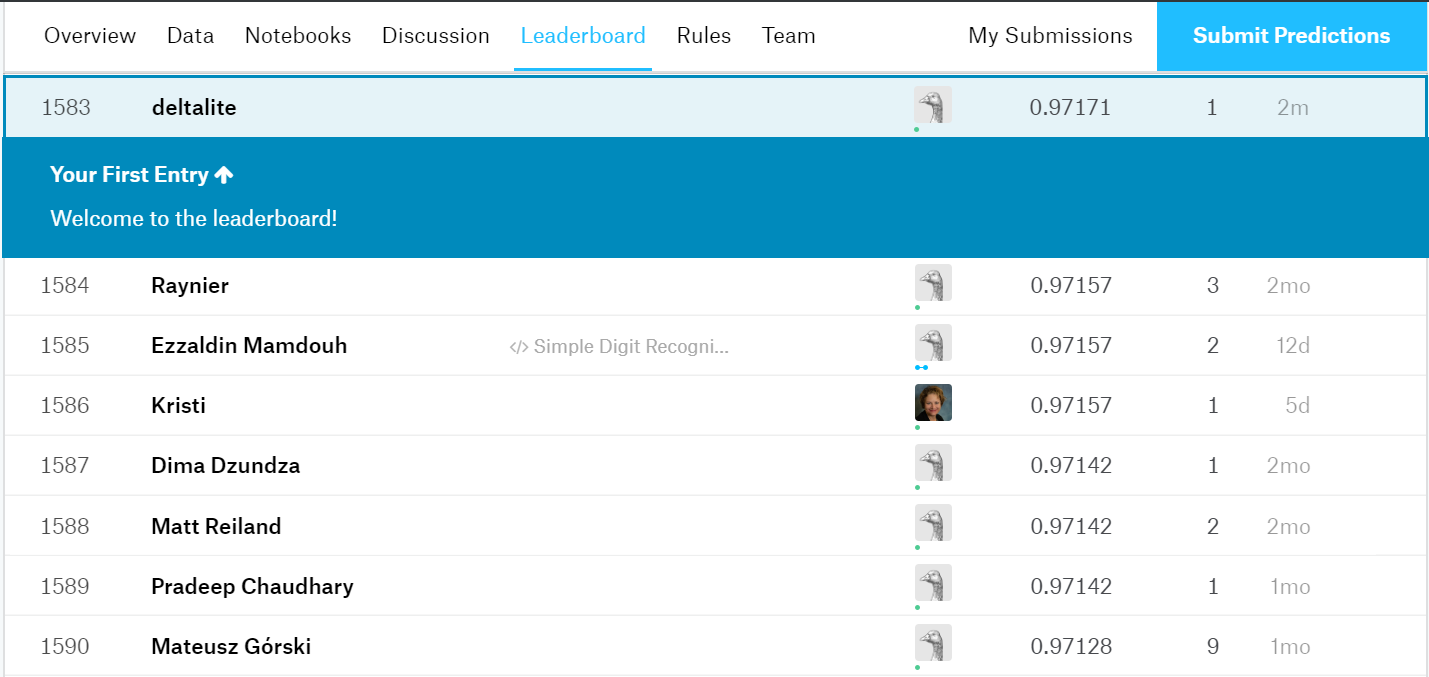

In [16]:
from IPython.display import Image
Image('scoreboard1.PNG')

Since my first submission, I have tried several variations on my neural network:
1. Higher epochs:
    Resulted in lower score due to overfitting.
    Overfitting became a smaller concern once dropout layers were added.
    (Dropout layers randomly exclude the given percentage of nodes from the previous layer, requiring the CNN to predict and shift weights based on other inputs)
2. Add consequtive convolution filter layers:
    By extracting convolutional filters based on a previous layers' convolution filters, we get more specific features. So far I haven't seen this as an improvement on my single filter convolutional layers, but it is something I have seen in other people's model. Using the activation function relu, we do get a non-linear function output, so perhaps in some cases this decision has a beneficial effect. 
    The second/deeper sets of convolution layers do extract more "high-level" features, which become pronounced by the maxpooling layer (reduces dimensions). This definitely has a generally positive effect and is widely used. 
    I will continue to look at using two conv layers one after the other, but I am unsure as to how beneficial it can be for the current problem with my model.